In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import missingno as msno
import warnings
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, accuracy_score
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [290]:
# Cargar el dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Analisis exploratorio

In [291]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [293]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Missing values
A primera vista parece no haber missing values, pero hay algunos valores faltantes en la forma de espacios en blanco en la columna 'TotalCharges'

<Axes: >

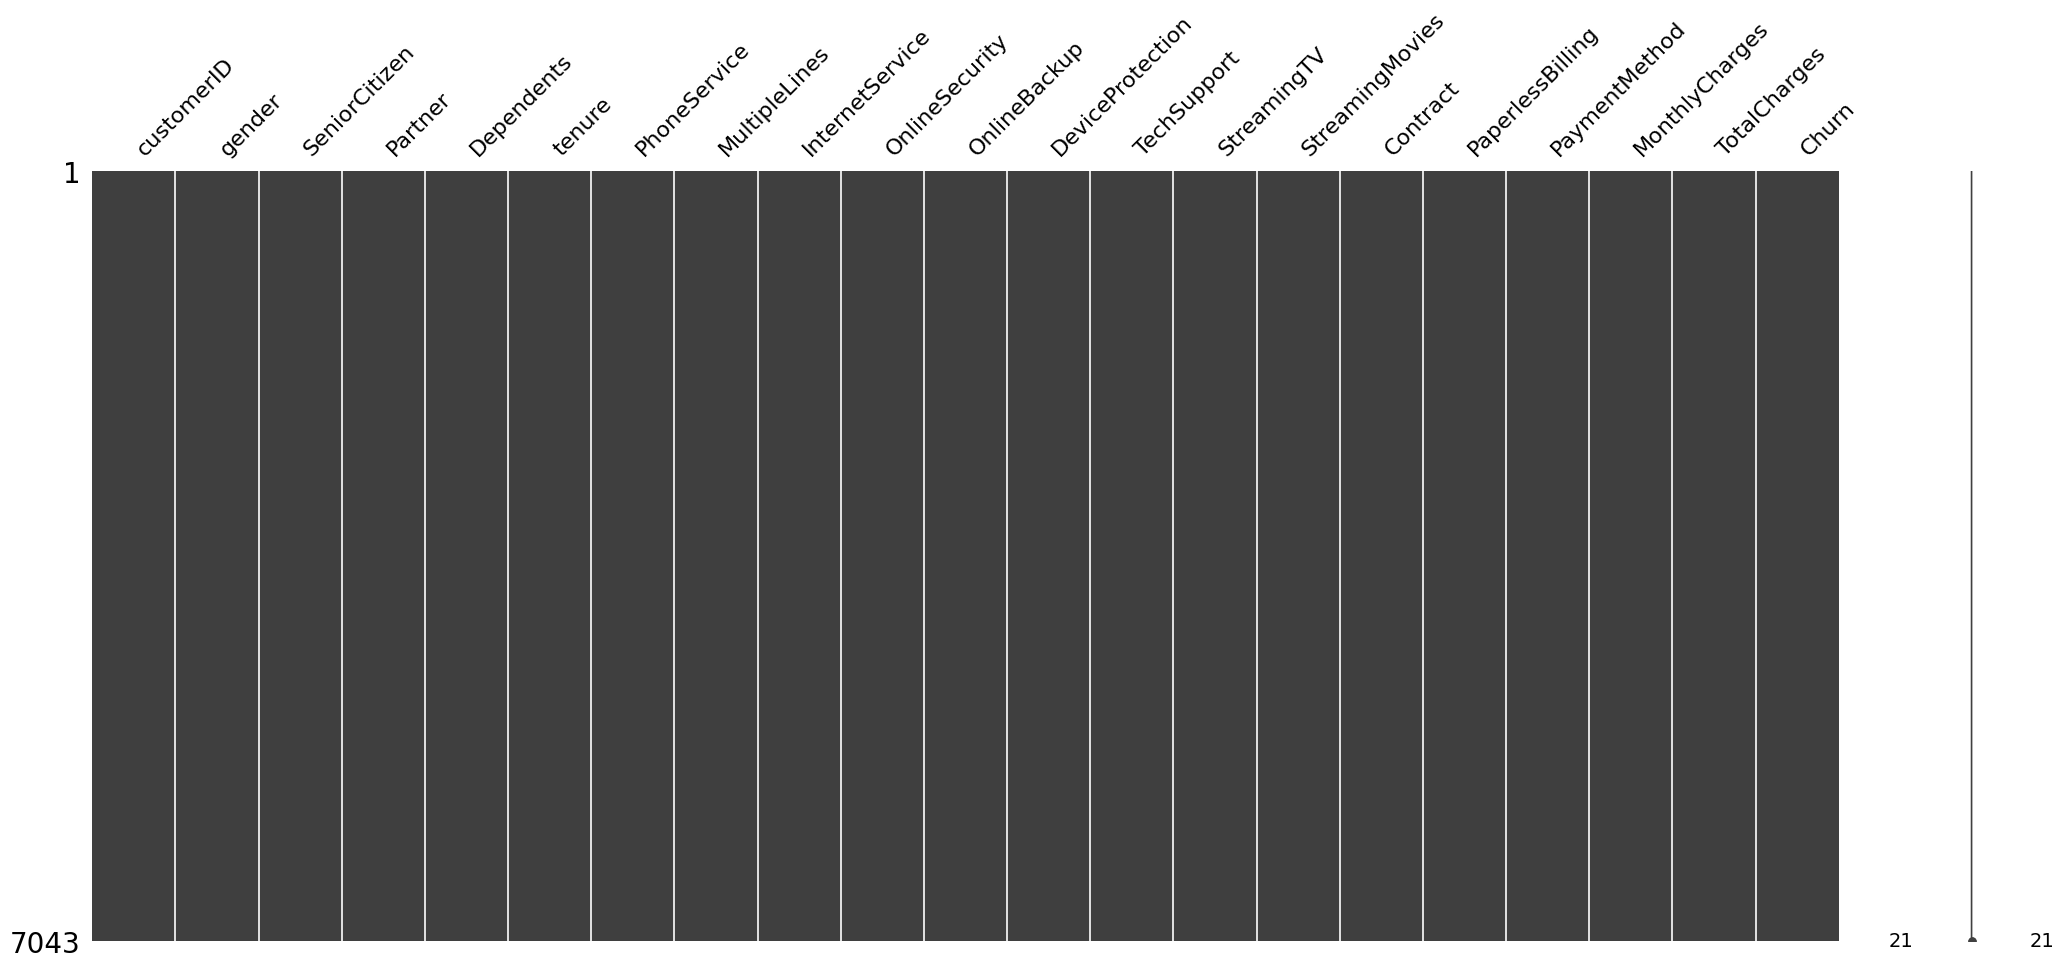

In [294]:
msno.matrix(df)

# Manipulacion y limpieza inicial

In [295]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [296]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Podemos ver como el valor de tenure es 0 es para estas filas, tenure es la cantidad de meses que el cliente estuvo con la firma, por lo que no tiene sentido tenerlos en cuenta para el analisis

In [297]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

### Los missing values en total charges coinciden con los 0 en tenure. Eliminaremos estas filas

In [298]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [299]:
df['MonthlyCharges'] = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### En monthly charges, que tambien estaba en formato categorico, no parece haber el mismo problema

In [300]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [301]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [302]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Visualizacion

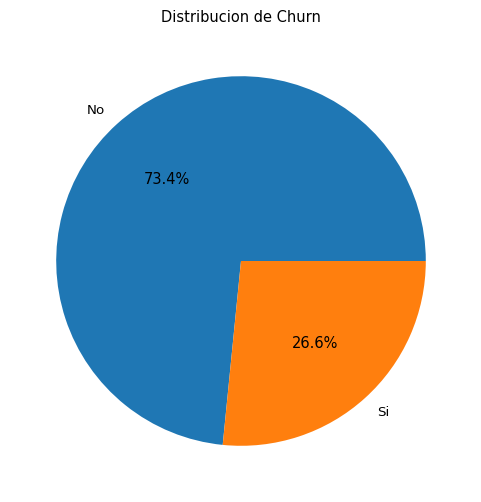

In [303]:
plt.figure(figsize=(6,6))
plt.pie(df['Churn'].value_counts(), labels=['No', 'Si'], autopct='%1.1f%%')
plt.title('Distribucion de Churn')
plt.show()

26,6% de los clientes se pasaron a otra firma

In [304]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [305]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

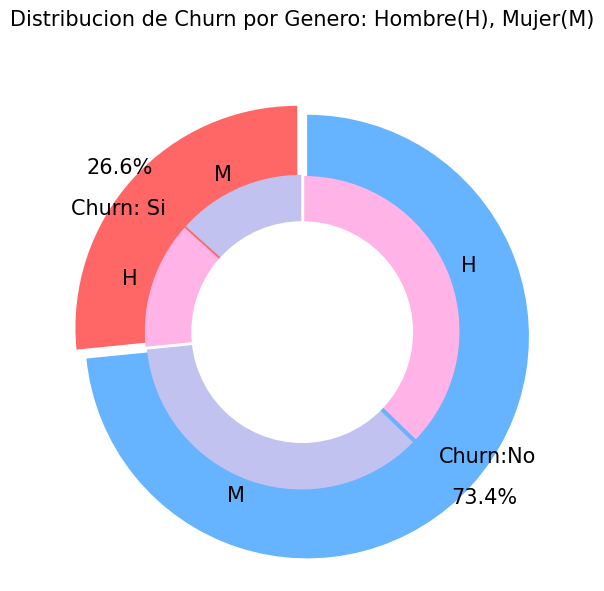

In [306]:
plt.figure(figsize=(6, 6))
labels =["Churn: Si","Churn:No"]
values = [1869,5163]
labels_gender = ["M","H","M","H"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribucion de Churn por Genero: Hombre(H), Mujer(M)', fontsize=15, y=1.1)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

Ambos generos parecen comportarse de manera similar. No hay diferencia significativa

Text(0.5, 1.0, 'Distribucion de Churn por tiempo de contrato')

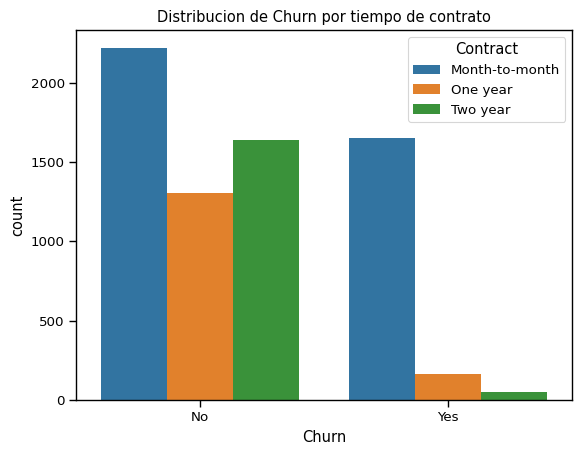

In [307]:
sns.countplot(data=df, x='Churn', hue='Contract').set_title('Distribucion de Churn por tiempo de contrato')

El 75% de los clientes con contratos de mes a mes cambiaron de firma, esto contrasta con un 13% para los contratos de 1 año y 3% para los que tienen contrato de 2 años

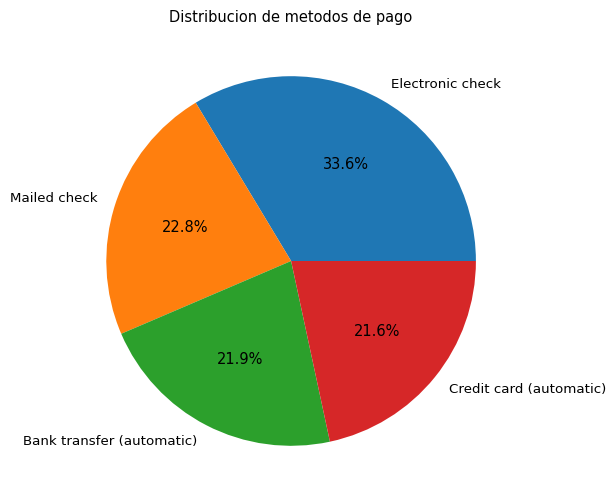

In [308]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribucion de metodos de pago')
plt.show()

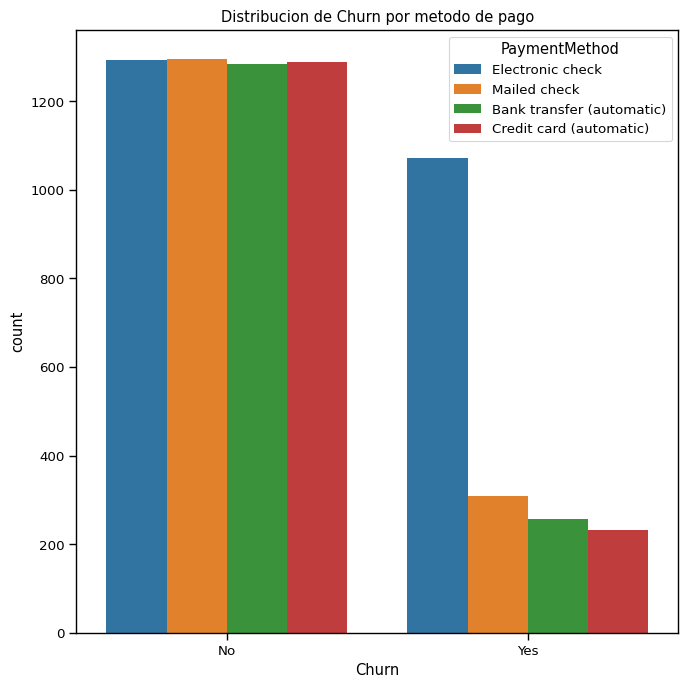

In [309]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='Churn', hue='PaymentMethod')
plt.title('Distribucion de Churn por metodo de pago')
plt.tight_layout()
plt.show()

La mayoria de los clientes que cambiaron de firma pagaban mediante cheque electronico. Los clientes que pagaban mediante cheque por correo, transferencia bancaria y tarjeta de credito tienen menor probabilidad de cambiar de firma.

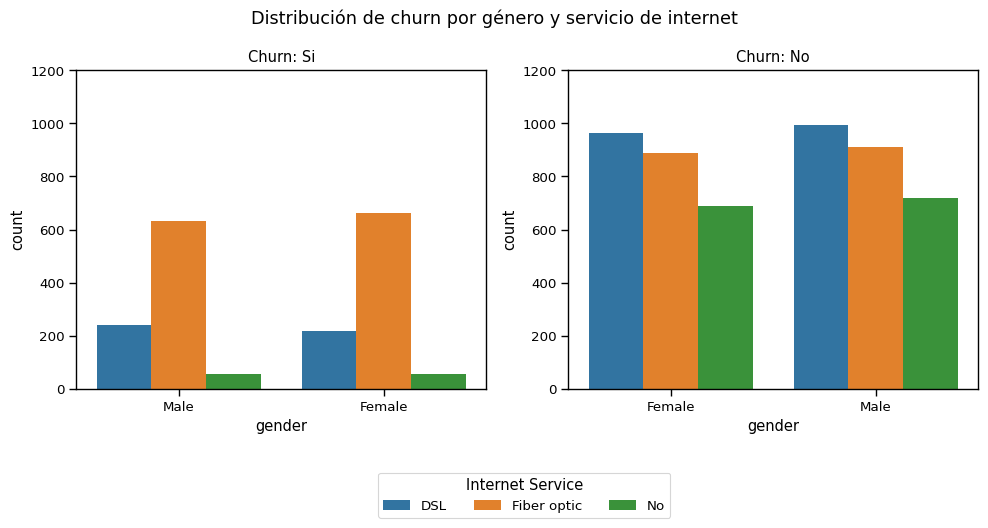

In [310]:
churn = df[df['Churn'] == 'Yes']
nochurn = df[df['Churn'] == 'No']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

countplot1 = sns.countplot(data=churn, x='gender', hue='InternetService', ax=ax[0])
countplot2 = sns.countplot(data=nochurn, x='gender', hue='InternetService', ax=ax[1])

countplot1.set_title('Churn: Si')
countplot2.set_title('Churn: No')

max_count = max(countplot1.get_yticks().max(), countplot2.get_yticks().max()) 

ax[0].set_ylim(0, max_count)
ax[1].set_ylim(0, max_count)

handles, labels = countplot1.get_legend_handles_labels()

countplot1.get_legend().remove()
countplot2.get_legend().remove()

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.53, -0.05), ncol=3,
           bbox_transform=fig.transFigure, title='Internet Service')

plt.suptitle('Distribución de churn por género y servicio de internet')
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

Muchos consumidores compran fibra optica, pero al mismo tiempo tiene la mayor tasa de churn. Esto puede ser debido a que los clientes quedan insatisfechos con el servicio
Los clientes con DSL son la mayoria y tienen menor tasa de churn que los de fibra optica

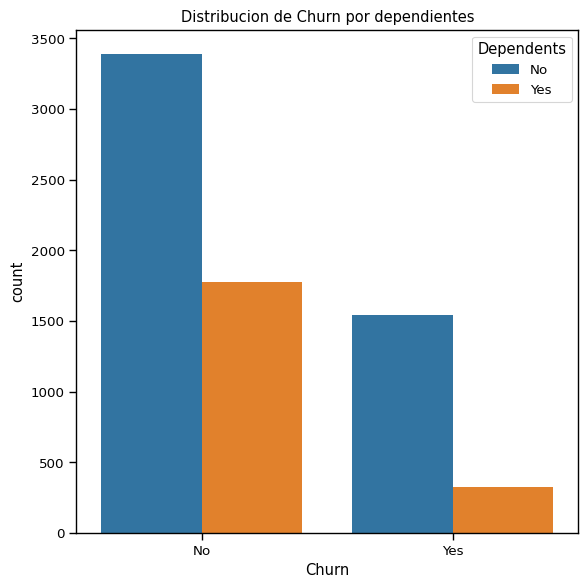

In [311]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Churn', hue='Dependents')
plt.title('Distribucion de Churn por dependientes')
plt.tight_layout()
plt.show()

Clientes sin dependientes son mas probables que cambien de firma

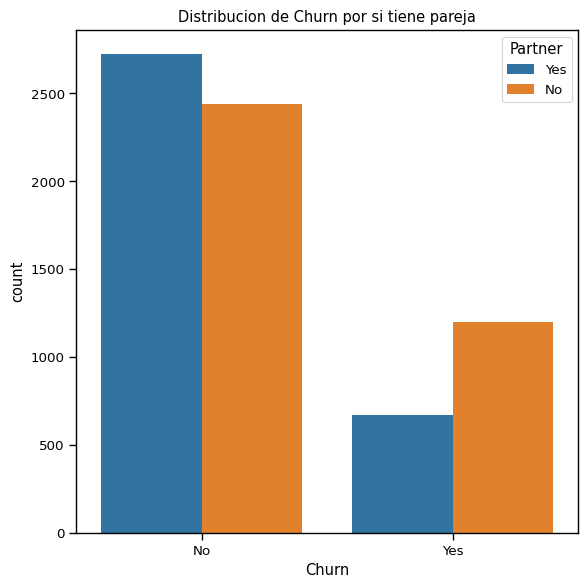

In [312]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Churn', hue='Partner')
plt.title('Distribucion de Churn por si tiene pareja')
plt.tight_layout()
plt.show()

Esta mas probable que cambien de firma los clientes sin pareja

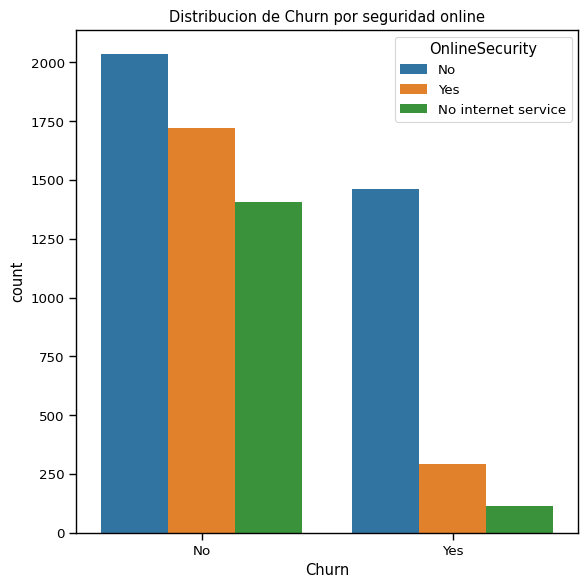

In [313]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Churn', hue='OnlineSecurity')
plt.title('Distribucion de Churn por seguridad online')
plt.tight_layout()
plt.show()

Los clientes que no tienen seguridad online es mas probable que cambien de firma

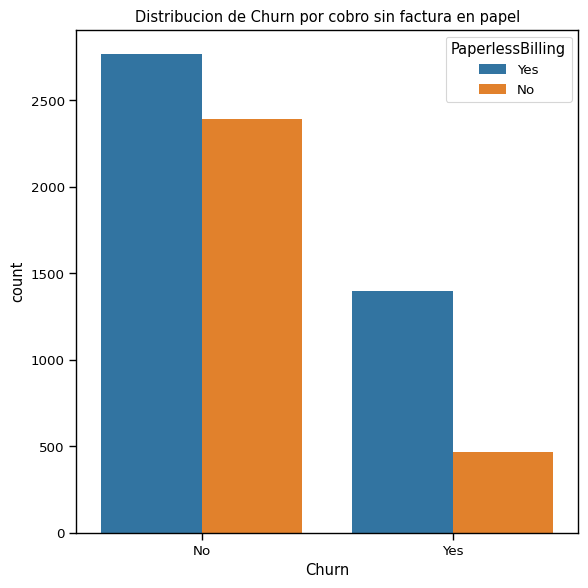

In [314]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Churn', hue='PaperlessBilling')
plt.title('Distribucion de Churn por cobro sin factura en papel')
plt.tight_layout()
plt.show()

Clientes sin factura en papel son mas propensos a cambiar de firma

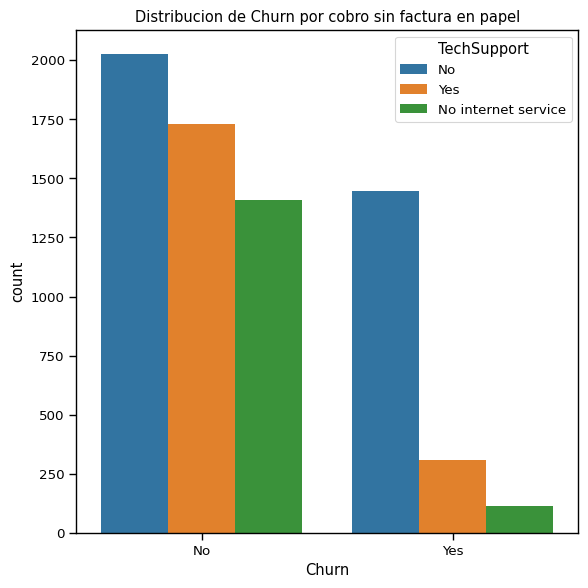

In [315]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Churn', hue='TechSupport')
plt.title('Distribucion de Churn por cobro sin factura en papel')
plt.tight_layout()
plt.show()

Clientes sin servicio tecnico son mas propensos a cambiar de firma

Text(0.5, 1.0, 'Distribucion de pagos mensuales por churn')

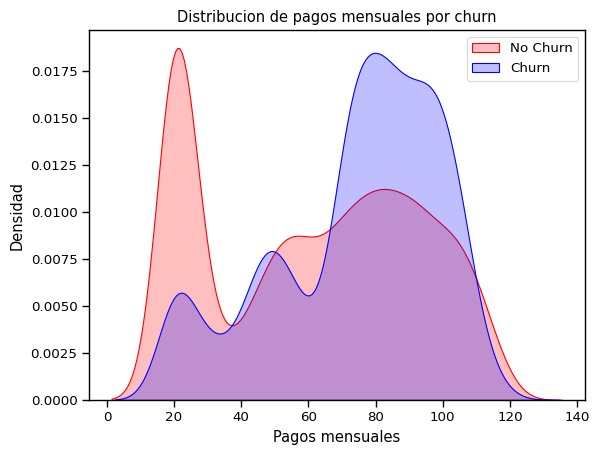

In [316]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')
ax.set_ylabel('Densidad')
ax.set_xlabel('Pagos mensuales')
ax.set_title('Distribucion de pagos mensuales por churn')

Podemos ver que los clientes con pagos mensuales mas altos son mas propensos a cambiar de firma

Text(0.5, 1.0, 'Distribucion de pagos totales por churn')

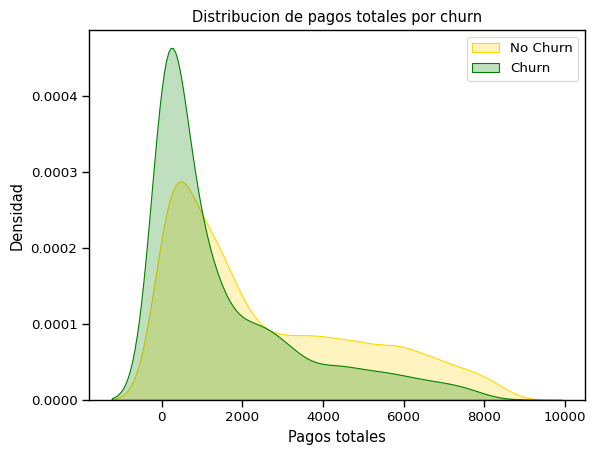

In [317]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Pagos totales');
ax.set_title('Distribucion de pagos totales por churn')

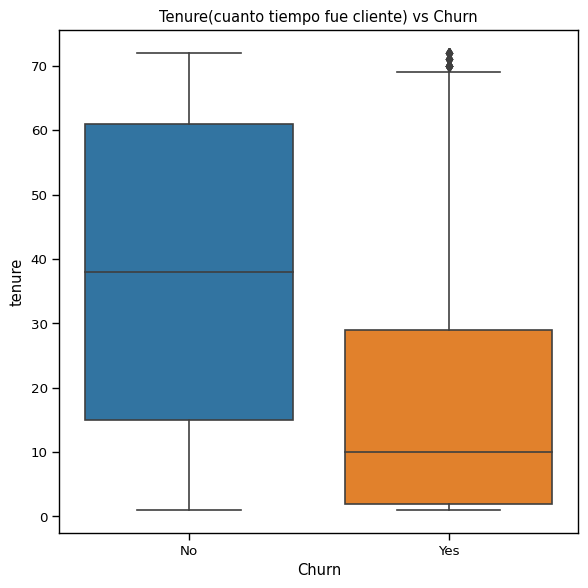

In [318]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure(cuanto tiempo fue cliente) vs Churn')
plt.tight_layout()
plt.show()

Podemos ver que clientes nuevos son mas propensos a cambiar de firma

## Correlacion

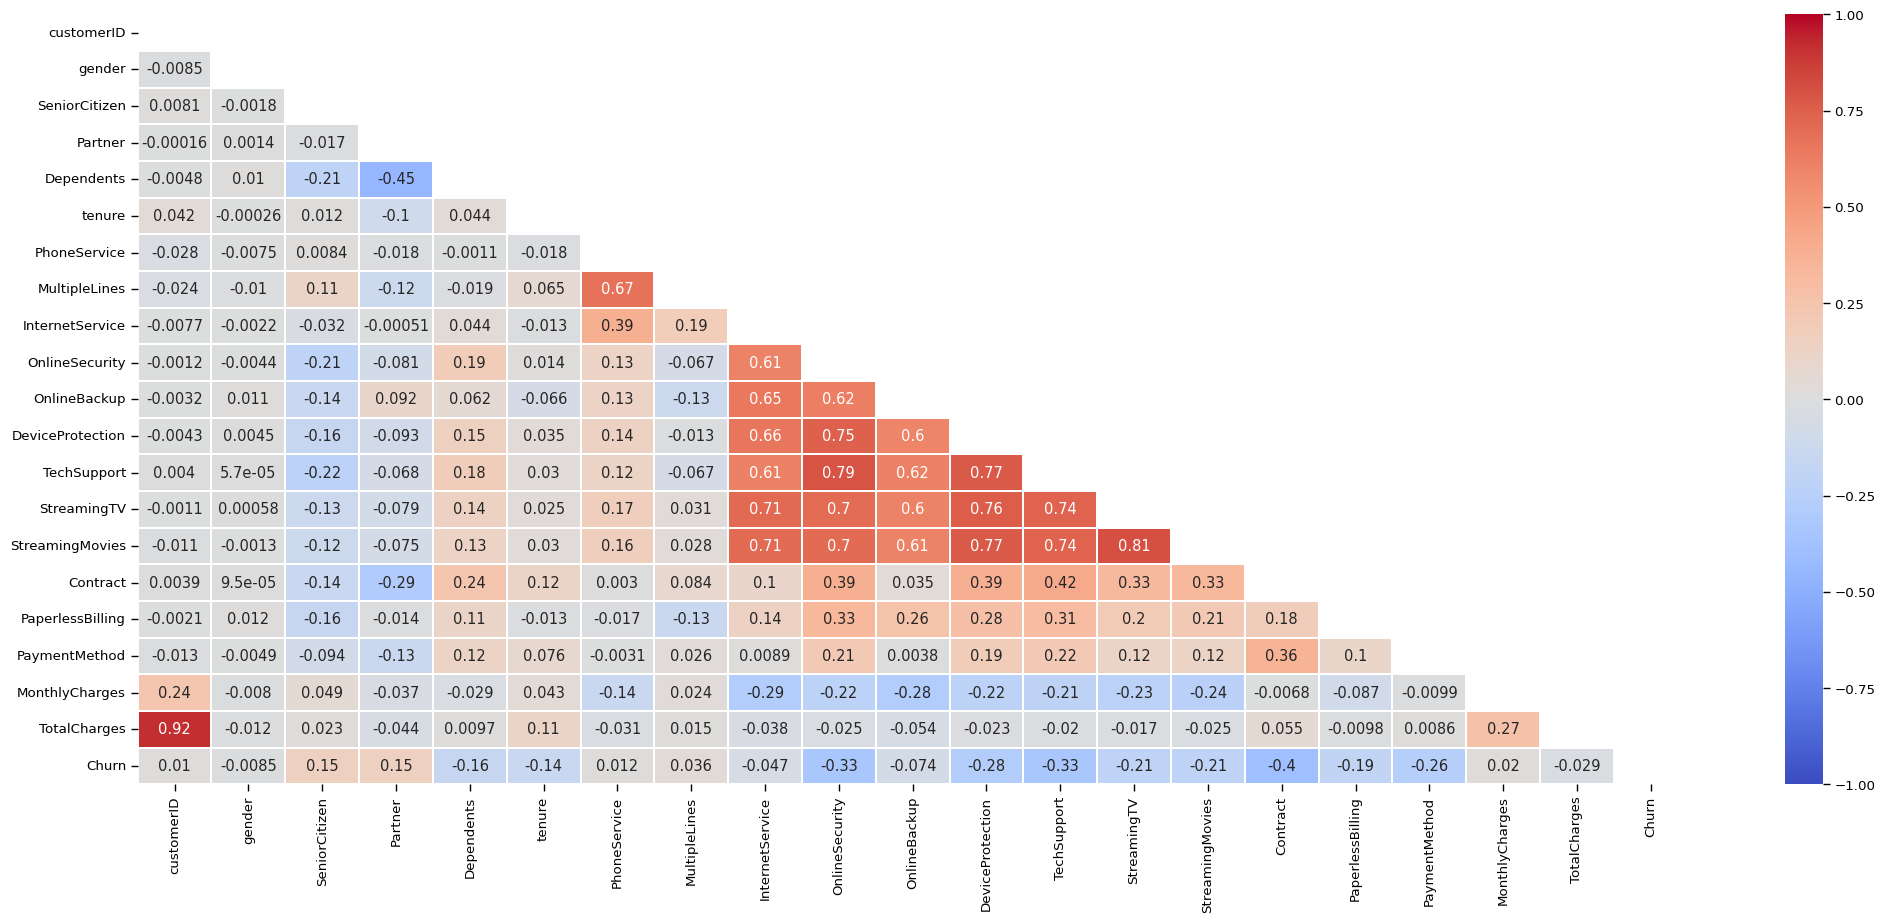

In [319]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Procesamiento de datos

In [320]:
df.drop('customerID', axis=1, inplace=True)

In [321]:
X = df.drop('Churn', axis=1)
y = df['Churn']

y = y.map({"No":0,"Yes":1})

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [323]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

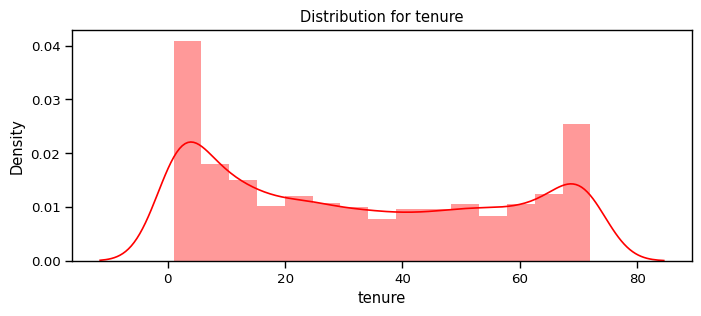

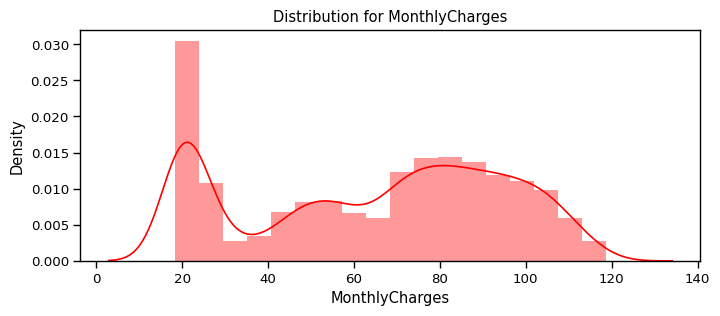

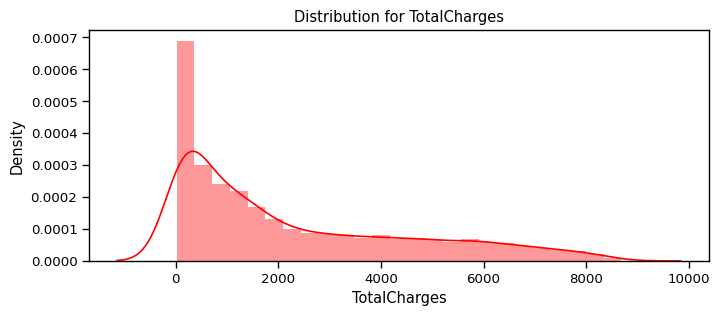

In [324]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Dado que las variables numericas estan distribuidas sobre valores distintos las escalaremos usando un standard scaler

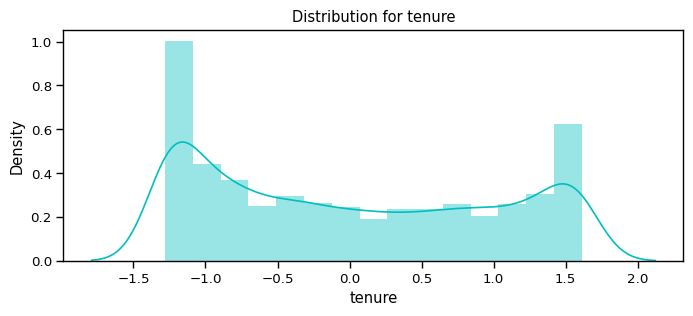

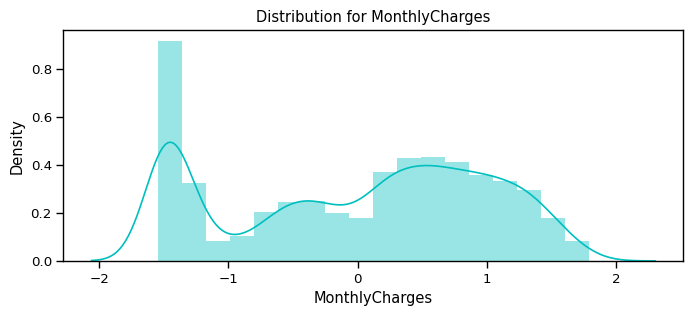

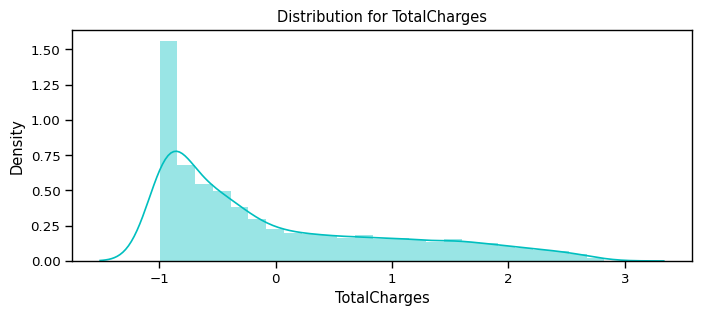

In [325]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

Dividimos las columnas en 3 categorias, una para ser estandarizada, otra para label encoding y otra para one hot encoding

In [326]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) # label encoding

In [327]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [328]:
ohencoder = OneHotEncoder(sparse_output=False)

X_train_encoded = ohencoder.fit_transform(X_train[cat_cols_ohe])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohencoder.get_feature_names_out(cat_cols_ohe), index=X_train.index) 

X_test_encoded = ohencoder.transform(X_test[cat_cols_ohe])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohencoder.get_feature_names_out(cat_cols_ohe), index=X_test.index) 

X_train = X_train.drop(cat_cols_ohe, axis=1)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

X_test = X_test.drop(cat_cols_ohe, axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

In [329]:
lencoder = LabelEncoder()
for col in cat_cols_le:
    X_train[col] = lencoder.fit_transform(X_train[col])
    X_test[col] = lencoder.transform(X_test[col])

# Modelado y evaluacion

## Regresion logistica

In [330]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy: ",accuracy_lr)

Logistic Regression accuracy:  0.8109004739336493


In [331]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.57      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



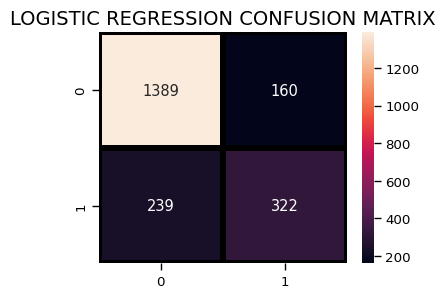

In [332]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

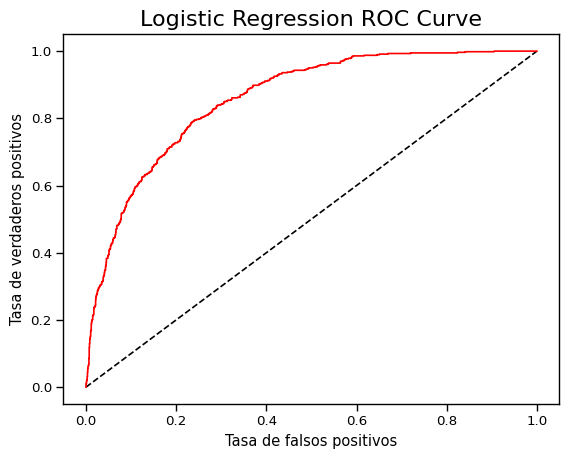

In [333]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

## Random Forest

In [334]:
rf_model = RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =23, max_features = "auto",
                                  max_leaf_nodes = 40)
rf_model.fit(X_train, y_train)

prediction_test = rf_model.predict(X_test)
print('Random Forest accuracy: ',accuracy_score(y_test, prediction_test))

Random Forest accuracy:  0.8113744075829384


In [335]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.69      0.53      0.60       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



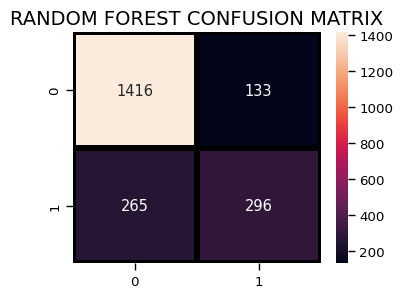

In [336]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

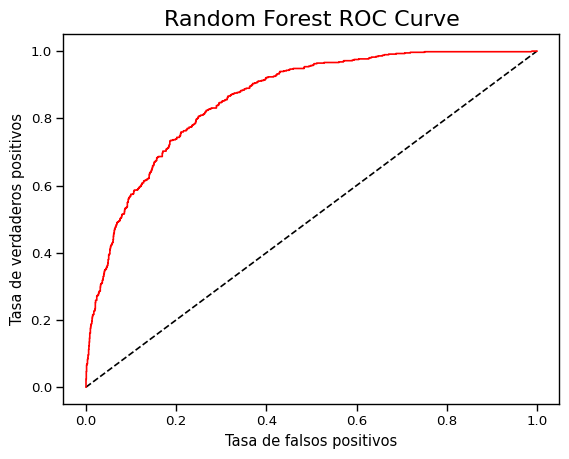

In [337]:
y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## GradientBoostingClassifier

In [338]:
gb_model = GradientBoostingClassifier(n_estimators=70, random_state=23)
gb_model.fit(X_train,y_train)
gb_preds = gb_model.predict(X_test)
print("GradientBoosting Classifier accuracy: ",accuracy_score(y_test, gb_preds))

GradientBoosting Classifier accuracy:  0.8099526066350711


In [339]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



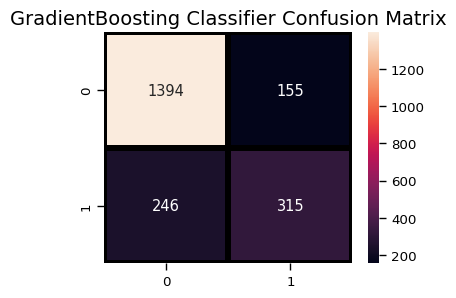

In [340]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("GradientBoosting Classifier Confusion Matrix",fontsize=14)
plt.show()

## Ensamble: Voting Classifier

In [341]:
voting = VotingClassifier(estimators=[('rf', rf_model), ('lr', lr_model), ('gbc', gb_model)], voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features='auto',
                                                     max_leaf_nodes=40,
                                                     n_estimators=300,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=23)),
                             ('lr', LogisticRegression()),
                             ('gbc',
                              GradientBoostingClassifier(n_estimators=70,
                                                         random_state=23))],
                 voting='soft')

In [342]:
predictions = voting.predict(X_test)
print("Accuracy Score final")
print(accuracy_score(y_test, predictions))

Accuracy Score final
0.8137440758293839


In [343]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.68      0.56      0.62       561

    accuracy                           0.81      2110
   macro avg       0.77      0.73      0.75      2110
weighted avg       0.81      0.81      0.81      2110



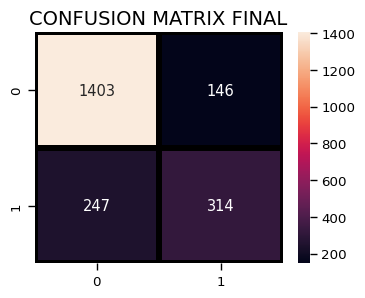

In [344]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("CONFUSION MATRIX FINAL",fontsize=14)
plt.show()

# Conclusiones y recomendaciones

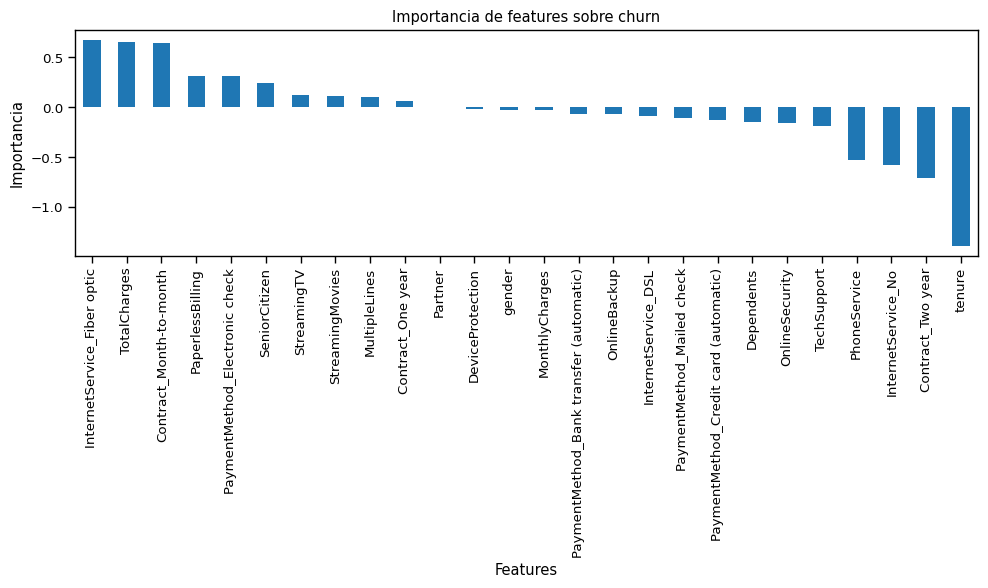

In [345]:
feature_importance = pd.Series(lr_model.coef_[0], index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('Importancia de features sobre churn')
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

Adquirir un nuevo consumidor puede costar hasta 5 veces lo que cuesta retener a uno. A partir de este analisis conseguimos un modelo capaz de identificar cuales son nuestros clientes con mayor riesgo de cambiar de firma y poder accionar acordemente para retenerlos. Tambien pudimos identificar las variables que mayor impacto tienen sobre el churn:
* Acorde a los visto en el analisis exploratorio, el servicio de fibra optica es un gran predictor de churn, esto puede estar relacionado a la calidad del servicio, por lo que sera necesario informar a los responsables de fibra optica y que investiguen las causas. De la mano de esto tambien podemos ver como los contratos sin servicio de internet y los contratos de telefono tienden a retener clientes, esto refuerza la hipotesis de que hay un problema de calidad en servicio de internet.
* Los contratos de mes a mes tambien tienen un gran impacto, deberiamos llevar a cabo un plan para ver si es posible la implementacion de ofertas en los planes de año o 2 años. Como podemos ver, los contratos de 2 años tienden a retener al cliente en gran medida.
* Podemos ver que el tenure es la variable que mas ayuda a retener clientes, esto indica que los clientes de mucho tiempo estan contentos con el servicio, es muy importante mantener esta relacion con los clientes de muchos años
* Vemos que los montos totales tambien tienen un gran impacto sobre el churn, esto podria estar relacionado al servicio de fibra optica que usualmente es el mas caro. Si un servicio es caro y su calidad no refleja el precio es esperable que las personas cambien de firma.